In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/home/inzi/Downloads/archive/placement-dataset.csv')

In [5]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [7]:
df.shape

(100, 4)

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [11]:
import matplotlib.pyplot as plt


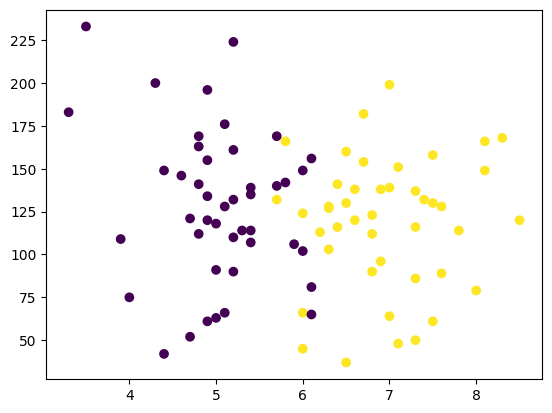

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,NaN,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [34]:
# Drop rows with NaN
X = X.dropna()
y = y.loc[X.index]   # keep y aligned with X


In [35]:
y.shape

(88,)

In [36]:
y

0     1
1     0
3     1
4     0
5     1
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 88, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [33]:
X_train

array([[-0.99647232,  0.48082755],
       [ 0.02811364,  0.11444736],
       [ 0.54040662,  0.41617222],
       [ 0.02811364, -1.13555564],
       [-0.91109016,  1.66617522],
       [-0.91109016,  0.78255241],
       [ 0.62578878,  1.36445036],
       [-1.16723665,  0.58858643],
       [ 0.71117094, -0.14417395],
       [ 0.54040662,  0.02824026],
       [-0.48417934,  0.437724  ],
       [-0.91109016, -1.24331452],
       [-1.33800097,  0.65324176],
       [-0.99647232,  0.95496662],
       [ 0.71117094, -0.61831302],
       [ 0.36964229,  0.48082755],
       [-0.74032583, -1.13555564],
       [ 1.13808176,  0.39462045],
       [ 0.1134958 , -0.812279  ],
       [ 0.02811364, -0.35969171],
       [ 1.39422825, -0.63986479],
       [ 1.22346392,  0.28686157],
       [-1.08185448, -1.4372805 ],
       [-0.48417934,  0.3515169 ],
       [        nan, -2.53642107],
       [ 0.96731743,  0.69634531],
       [-0.65494367, -0.61831302],
       [ 1.30884609, -1.24331452],
       [ 0.45502445,

In [38]:
y_train

13    1
57    1
11    1
48    1
45    1
     ..
19    0
20    1
38    1
16    0
74    1
Name: placement, Length: 79, dtype: int64

In [39]:
X_test

,cgpa,iq
99,6.2,113.0
32,7.0,139.0
27,6.0,124.0
53,8.3,168.0
24,4.7,121.0
70,6.3,127.0
55,7.8,114.0
66,6.9,96.0
39,4.6,146.0


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_train

array([[ 3.89449690e-01, -1.62389638e-01],
       [ 4.76606985e-01,  1.62978006e-01],
       [ 8.25236169e-01,  3.48902373e-01],
       [ 5.63764281e-01,  3.48902373e-01],
       [ 4.08205057e-02, -1.32441693e+00],
       [-8.30752454e-01, -1.39413857e+00],
       [ 7.38078873e-01, -7.66643832e-01],
       [ 3.02292394e-01, -4.64516735e-01],
       [-4.82123270e-01,  2.79180736e-01],
       [ 1.34817995e+00,  8.13713292e-01],
       [-9.17909750e-01, -6.94274537e-02],
       [ 1.27977802e-01, -9.75808746e-01],
       [-4.82123270e-01, -2.08870729e-01],
       [-7.43595158e-01, -1.32441693e+00],
       [-7.43595158e-01,  1.23204312e+00],
       [ 1.27977802e-01, -1.34765748e+00],
       [-9.17909750e-01, -1.44061966e+00],
       [-4.63367903e-02, -3.94795097e-01],
       [-1.00506705e+00, -2.55351821e-01],
       [-1.33494086e-01,  4.41864557e-01],
       [-8.30752454e-01, -1.15908546e-01],
       [-4.82123270e-01,  3.72142919e-01],
       [ 4.76606985e-01, -1.99839277e+00],
       [-2.

In [44]:
X_test = scaler.transform(X_test)

In [45]:
X_test

array([[ 0.2151351 , -0.23211128],
       [ 0.91239347,  0.37214292],
       [ 0.04082051,  0.02353473],
       [ 2.04543831,  1.04611875],
       [-1.09222434, -0.04618691],
       [ 0.30229239,  0.09325637],
       [ 1.60965183, -0.20887073],
       [ 0.82523617, -0.62720056],
       [-1.17938164,  0.53482674]])

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression()

In [48]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred = clf.predict(X_test)

In [50]:
y_test

99    1
32    1
27    1
53    1
24    0
70    1
55    1
66    1
39    0
Name: placement, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

0.8888888888888888

In [53]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

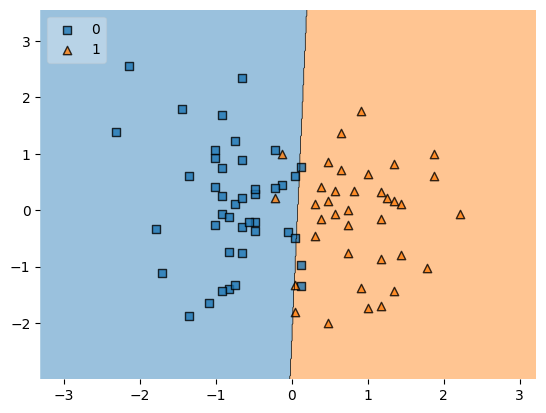

In [54]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [103]:
import pickle

In [104]:
pickle.dump(clf,open('model.pkl','wb'))